In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import powerlaw
from abc_analysis import abc_analysis

In [3]:
df = pd.read_csv('./data/cleaned.csv')

In [12]:
arr = df['prize'].to_numpy()

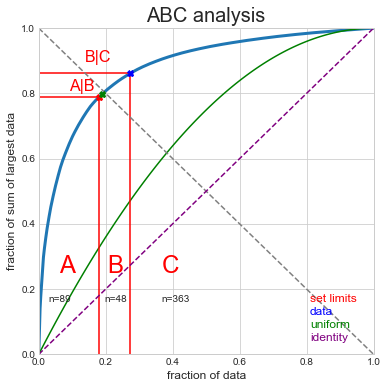

In [4]:
abc = abc_analysis(df['prize'], True)

In [6]:
abc.get('Aind')

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88]

In [9]:
df.drop(columns=['log prize', 'inv prize'], inplace=True)

In [10]:
df.set_index('rank', inplace=True)

In [12]:
df

,name,country,prize
rank,,,
1,Michael van Gerwen,Netherlands,8321167
2,Phil Taylor,England,7630816
3,Gary Anderson,Scotland,4118772
4,Raymond van Barneveld,Netherlands,3510128
5,Peter Wright,Scotland,3470888
...,...,...,...
496,Ben Robb,New Zealand,15339
497,Shane O Connor,Ireland,15325
498,Karin Krappen,Netherlands,15279


In [14]:
abc.keys()

dict_keys(['ABLimit', 'BCLimit', 'ABexchanged', 'Aind', 'Bind', 'Cind', 'smallestAData', 'smallestBData', 'AlimitIndInInterpolation', 'BlimitIndInInterpolation', 'p', 'ABC', 'A', 'B', 'C', 'CleanedData'])

In [26]:
def abc_label(index, abc=abc):
    if index in abc['Aind']:
        return 'A'
    elif index in abc['Bind']:
        return 'B'
    else:
        return 'C'

In [32]:
abc_vect = np.vectorize(abc_label)

In [33]:
df['ABC'] = abc_vect(df['index'])

In [29]:
df['index'] = list(range(500))

In [35]:
df.drop(columns='index', inplace=True)

In [36]:
df

,name,country,prize,ABC
rank,,,,
1,Michael van Gerwen,Netherlands,8321167,A
2,Phil Taylor,England,7630816,A
3,Gary Anderson,Scotland,4118772,A
4,Raymond van Barneveld,Netherlands,3510128,A
5,Peter Wright,Scotland,3470888,A
...,...,...,...,...
496,Ben Robb,New Zealand,15339,C
497,Shane O Connor,Ireland,15325,C
498,Karin Krappen,Netherlands,15279,C


<AxesSubplot:xlabel='rank', ylabel='prize'>

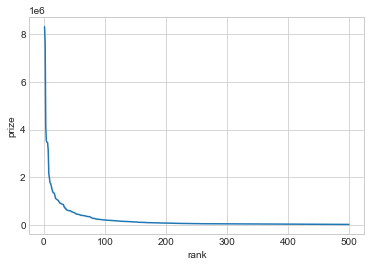

In [43]:
sns.lineplot(x=df.index, y=df['prize'])

<AxesSubplot:xlabel='rank', ylabel='prize'>

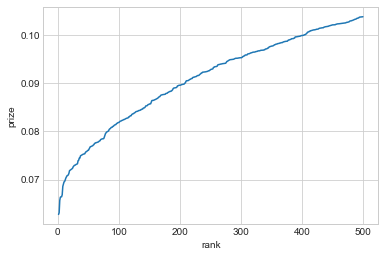

In [51]:
sns.lineplot(x=df.index, y=1/np.log(df['prize']))

In [75]:
import powerlaw
results = powerlaw.Fit(arr[::-1])
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

1.6578626504112728
15259.0


Calculating best minimal value for power law fit
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [68]:
alpha = results.power_law.alpha

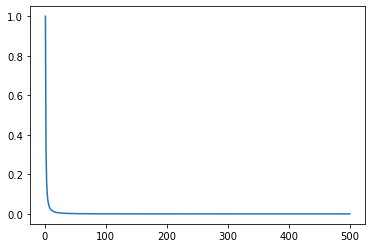

In [71]:
fig, ax = plt.subplots(1, 1)

x = np.arange(1, 501)
# ax.scatter(x, arr)
ax.plot(x, np.power(x, -1*alpha))

In [55]:
df['cumulative'] = df['prize'].cumsum()

In [56]:
df

,name,country,prize,ABC,cumulative
rank,,,,,
1,Michael van Gerwen,Netherlands,8321167,A,8321167
2,Phil Taylor,England,7630816,A,15951983
3,Gary Anderson,Scotland,4118772,A,20070755
4,Raymond van Barneveld,Netherlands,3510128,A,23580883
5,Peter Wright,Scotland,3470888,A,27051771
...,...,...,...,...,...
496,Ben Robb,New Zealand,15339,C,113064243
497,Shane O Connor,Ireland,15325,C,113079568
498,Karin Krappen,Netherlands,15279,C,113094847


In [59]:
df.loc[500, 'cumulative'] * .8

90500305.60000001

In [60]:
df[df['cumulative'] >= 90_000_000]

,name,country,prize,ABC,cumulative
rank,,,,,
94,Luke Humphries,England,217015,B,90134837
95,Michael Mansell,Northern Ireland,215823,B,90350660
96,Lourence Ilagan,Philippines,209278,B,90559938
97,Gary Robson,England,207726,B,90767664
98,Ron Meulenkamp,Netherlands,204514,B,90972178
...,...,...,...,...,...
496,Ben Robb,New Zealand,15339,C,113064243
497,Shane O Connor,Ireland,15325,C,113079568
498,Karin Krappen,Netherlands,15279,C,113094847


<AxesSubplot:xlabel='rank', ylabel='prize'>

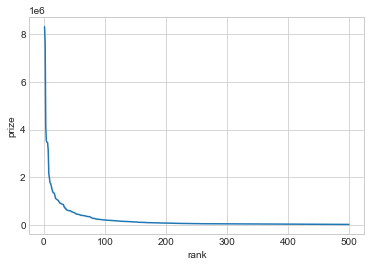

In [67]:
sns.lineplot(x=df.index, y=df['prize'])

In [97]:
df['% of cumsum'] = df['cumulative']/np.max(df['cumulative'])

In [101]:
90559938/np.max(df['cumulative'])

0.8005271354575404

In [156]:
df['prize'] = df['prize']/1_000_000

Text(0, 0.5, 'Prize Money (£, Millions)')

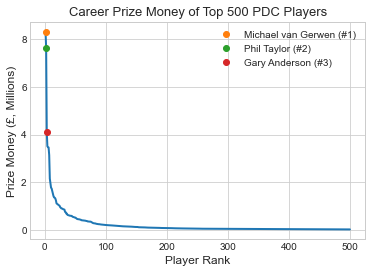

In [162]:
fig, ax = plt.subplots(1, 1)

ax.plot(df.index, df['prize'], linewidth=2)
ax.plot([1], [8.321167], 'o', label='Michael van Gerwen (#1)')
ax.plot([2], [7.630816], 'o', label='Phil Taylor (#2)')
ax.plot([3], [4.118772], 'o', label='Gary Anderson (#3)')

ax.legend()
ax.set_title('Career Prize Money of Top 500 PDC Players', fontsize=13)
ax.set_xlabel('Player Rank', fontsize='larger')
ax.set_ylabel('Prize Money (£, Millions)', fontsize='larger')

Text(0, 0.5, '% of Cumulative Prize Sum')

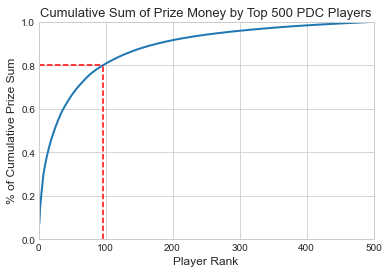

In [150]:
fig, ax = plt.subplots(1, 1)

ax.plot(df.index, df['% of cumsum'], linewidth=2)
ax.plot([96, 96], [0, .8005], '--r')
ax.plot([0, 96], [.8005, .8005], '--r')

ax.set_xbound(0, 500)
ax.set_ybound(0, 1)
ax.set_title('Cumulative Sum of Prize Money by Top 500 PDC Players', fontsize=13)
ax.set_xlabel('Player Rank', fontsize='larger')
ax.set_ylabel('% of Cumulative Prize Sum', fontsize='larger')